<a href="https://colab.research.google.com/github/Balakalki/NeuralNet_FaceClassifier/blob/main/ANN_(Mnist%20and%20Face%20Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np
import pandas as pd
from urllib.parse import urljoin

# Function to download images from the provided URL and assign labels
def download_images_and_assign_labels(url_base, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize lists to store data
    labels_all = []
    images_all = []

    # Get list of folders inside the "faces" directory
    response = requests.get(url_base)
    soup = BeautifulSoup(response.content, 'html.parser')
    folder_tags = soup.find_all('a')
    folders = [folder['href'] for folder in folder_tags if folder['href'].endswith('/')]

    # Loop through each folder
    for folder in folders:
        folder_url = urljoin(url_base, folder)
        response = requests.get(folder_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        anchor_tags = soup.find_all('a')

        labels = []
        images = []

        for anchor_tag in anchor_tags:
            img_url = anchor_tag['href']
            if img_url.endswith('.pgm'):
                label = assign_label_from_filename(img_url)
                if label != "unknown":
                    filename = img_url.split('/')[-1]  # Extract filename from URL
                    image_path = os.path.join(output_dir, filename)
                    if os.path.exists(image_path):
                        print(f"Skipping {filename}. Already downloaded.")
                    else:
                        response = requests.get(urljoin(folder_url, img_url))
                        with open(image_path, 'wb') as f:
                            f.write(response.content)
                        print(f"Downloaded {filename} from {folder} with label {label}")

                        # Load and preprocess the image
                        image_data = preprocess_image(image_path)

                        # Append the label and image data to the lists
                        labels.append(label)
                        images.append(image_data)

        # Append data from this folder to the overall lists
        labels_all.extend(labels)
        images_all.extend(images)

    return labels_all, images_all

# Function to assign labels based on filename substring
def assign_label_from_filename(filename):
    if "left" in filename:
        return 0
    elif "right" in filename:
        return 1
    elif "up" in filename:
        return 2
    elif "straight" in filename:
        return 3
    else:
        return "unknown"

# Function for image preprocessing
def preprocess_image(image_path):
    img = Image.open(image_path)
    # Resize, convert to grayscale, and normalize pixel values
    img = img.resize((30, 32))
    img = img.convert('L')
    img_array = np.array(img).flatten()
    return img_array

# Base URL of the website containing the folders (e.g., "https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/")
url_base = "https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/"

output_directory = "/content/drive/MyDrive/ml_lab/images_data2"

# Download images from all folders and assign labels
labels_all, images_all = download_images_and_assign_labels(url_base, output_directory)

# Create a DataFrame to store the data
data = {'Label': labels_all, 'Image': images_all}
df = pd.DataFrame(data)

# Example usage:
#


Downloaded an2i_left_angry_open.pgm from an2i/ with label 0
Downloaded an2i_left_angry_open_2.pgm from an2i/ with label 0
Downloaded an2i_left_angry_open_4.pgm from an2i/ with label 0
Downloaded an2i_left_angry_sunglasses.pgm from an2i/ with label 0
Downloaded an2i_left_angry_sunglasses_2.pgm from an2i/ with label 0
Downloaded an2i_left_angry_sunglasses_4.pgm from an2i/ with label 0
Downloaded an2i_left_happy_open.pgm from an2i/ with label 0
Downloaded an2i_left_happy_open_2.pgm from an2i/ with label 0
Downloaded an2i_left_happy_open_4.pgm from an2i/ with label 0
Downloaded an2i_left_happy_sunglasses.pgm from an2i/ with label 0
Downloaded an2i_left_happy_sunglasses_2.pgm from an2i/ with label 0
Downloaded an2i_left_happy_sunglasses_4.pgm from an2i/ with label 0
Downloaded an2i_left_neutral_open.pgm from an2i/ with label 0
Downloaded an2i_left_neutral_open_2.pgm from an2i/ with label 0
Downloaded an2i_left_neutral_open_4.pgm from an2i/ with label 0
Downloaded an2i_left_neutral_sunglasse

In [ ]:
print(len(images_all[0]))

IndexError: list index out of range

In [ ]:
import pandas as pd

# Example integer list
# labels_all = [1, 2, 3]
# Example list of lists (flattened image values)
# images_all = [[10, 20, 30], [40, 50, 60], [70, 80, 90]]

# Create a dictionary to store data for DataFrame
data_dict = {}

# Assigning column names for list of lists
column_names = ['p' + str(i+1) for i in range(960)]

# Populate the dictionary with the data
for i, integer in enumerate(labels_all):
    data_dict['label'] = labels_all
    data_dict.update({column_names[j]: [sublist[j] for sublist in images_all] for j in range(960)})

# Create DataFrame
df = pd.DataFrame(data_dict)

# Display DataFrame
print(df)

      label  p1  p2  p3  p4  p5  p6  p7  p8  p9  ...  p951  p952  p953  p954  \
0         0   8  51  27  31  84  64  76  69  66  ...    97    55    74   116   
1         0  10  50  31  36  81  63  77  70  67  ...    96    57    72   122   
2         0  15  50  28  38  80  66  77  71  66  ...    93    62    76   107   
3         0   6  11  16  15  14  12  11   9   9  ...    51    88   138   126   
4         0   7  13  16  15  13  11  11  10  10  ...    53    91   136   128   
...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
1867      2  11  43  51  48  45  43  42  39  37  ...   227   226   226   225   
1868      2  12  41  49  47  47  44  43  40  37  ...   226   226   225   223   
1869      2  11  44  52  48  47  45  43  40  38  ...   226   225   224   223   
1870      2  12  44  52  49  47  45  43  41  39  ...   226   226   225   224   
1871      2  12  42  50  48  48  45  42  40  38  ...   226   226   225   224   

      p955  p956  p957  p958  p959  p96

In [ ]:
print(df.shape)

(1872, 2)


In [ ]:
data_csv = df
data_csv.to_csv('/content/drive/MyDrive/ml_lab/MLAssignment/final_data_30_32.csv', index=False)

NameError: name 'df' is not defined

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mnist Hand Writen Digit Classifier**

In [1]:
import numpy as np
'''Layer class which stores
  Layer weights matrix,
  Layer bias ,
  activation function of layer and
  output of Layer
  (Output should be stored when we call calculate_output function)
'''

class Layer:
  def __init__(self,nNeurons,weights,bias,activation_function,activation_derivative):
    self.nNeurons = nNeurons
    self.weights = weights
    self.bias = bias
    self.activation_function = activation_function
    self.activation_derivative = activation_derivative
    self.delta = None
  def calculate_output(self,data,input_Layer=False):#returns output which should be used as input for the next layer
    if(input_Layer):#for input layer the weight matrix should be transposed because input layer only takes one feature of input  not entire input
      self.output = np.array(data)
    else:
      self.weighted_sum = np.dot(data,self.weights)+self.bias
      self.output = np.array(self.activation_function(self.weighted_sum))#stores the outputs of Layer which contains all neurons outputs of that particular layer
    return self.output



'''
Network class which contains
number of layers as nLayers and
list containing all layer objects

has a create_Network functino which used to create weights and bias for entire network

forwardPass function is used to pass the input to the network through input layers and travels to the output layer through hidden layers
calculate_error function takes the target output as argument and calculates the error between target output and network output
'''

class Network:
  def __init__(self,nLayers):
    self.nLayers=nLayers
    self.Layers=[]
    # self.pred_output=[]



  def input_act(self,x):
    return x
  def relu(self,x):
    return np.maximum(0,x)
  def relu_derivative(self,x):
    return np.where(x < 0, 0, 1)
  def softmax(self,x):
    exp_values=np.exp(x)
    expSum=np.sum(exp_values)
    return exp_values/expSum
  def softmax_derivative(self,x):
    # return self.softmax(x) * (1 - self.softmax(x))
    s = self.softmax(x).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)



  def Create_Network(self,nInputs):
    for i in range(self.nLayers-1):
      if i==0:#for input layer each neuron has single weight as it takes single input
        weights=np.ones(nInputs)
        bias=np.ones((nInputs))
        self.Layers.append(Layer(nInputs,weights,bias,self.input_act, self.input_act))
      else:
        nNeurons=int(input(f"enter number of neurons of Layer {i+1} "))
        weights=0.1*np.random.randn(nInputs,nNeurons)
        bias=0.1*np.random.randn((nNeurons))
        self.Layers.append(Layer(nNeurons,weights,bias,self.relu, self.relu_derivative))
        nInputs=nNeurons
    #output layer which takes different activation function
    nNeurons=int(input(f"enter number of neurons in output layer "))
    weights=0.1*np.random.randn(nInputs,nNeurons)
    bias=np.zeros((nNeurons))
    self.Layers.append(Layer(nNeurons,weights,bias,self.softmax, self.softmax_derivative))




  def forwardPass(self,Input_data):
    for i in range(self.nLayers):
      if(i==0):
        Input_data=self.Layers[i].calculate_output(Input_data,True)
      else:
        Input_data=self.Layers[i].calculate_output(Input_data)
    return Input_data



  def One_hot(self,x):
    ans = []
    for i in range(10):
      if(i==x):
        ans.append(1)
      else:
        ans.append(0)
    return np.array(ans)


  def calculate_deltas(self, targets):
    for i in range(self.nLayers - 1, 0, -1):
      if i == len(self.Layers)-1:
        self.Layers[i].delta = np.array(self.Layers[i].output - targets)
      else:
        self.Layers[i].delta = np.dot(self.Layers[i+1].delta, self.Layers[i+1].weights.T) * self.Layers[i].activation_derivative(self.Layers[i].weighted_sum)


  def Update_Weights(self,lr):
    for i in range(self.nLayers - 1, 0, -1):
      # self.Layers[i].bias -= np.dot(lr, self.Layers[i].delta)
      # self.Layers[i].weights -= self.Layers[i].delta[np.newaxis,:] * (np.dot(lr,self.Layers[i-1].output)[:, np.newaxis] * self.Layers[i].weights)
      self.Layers[i].weights -= lr * np.dot(self.Layers[i-1].output.T[:, np.newaxis], self.Layers[i].delta[np.newaxis, :])
      self.Layers[i].bias -= lr * self.Layers[i].delta





  def calculate_error(self, targets, outputs):
    return -np.sum((targets * np.log(outputs)))
      # epsilon = 1e-15
      # outputs = np.clip(outputs, epsilon, 1 - epsilon)
      # loss = -np.sum(targets * np.log(outputs))
      # return loss



  def backwardPass(self,targets, lr):
    self.calculate_deltas(targets)
    self.Update_Weights(lr)



  def fit(self, input_datas, target_labels, epochs, learning_rate):
      for epoch in range(epochs):
        total_error = 0
        for input_data,target in zip(input_datas, target_labels):
          outputs = self.forwardPass(input_data)
          targets = self.One_hot(target)
          error = self.calculate_error(targets, outputs)
          total_error+=error
          self.backwardPass(targets, learning_rate)
        print(f"Epoch {epoch + 1} / {epochs}, Error: {total_error/len(input_datas)}")


import pandas as pd
mnist_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
# print(mnist_train)

x_train = mnist_train.iloc[:,1:].values
y_train = mnist_train.iloc[:,:1].values
# print(x_train,y_train)

maxval = max(max(sublist) for sublist in x_train)
x_train = [[element / maxval for element in sublist] for sublist in x_train]
# print(x_train[0])



nLayers=int(input("enter number of layers"))
obj=Network(nLayers)  #object for Network class
obj.Create_Network(784)  #creates a network by creating layers and appending to Layers list in Network class (this takes input length as argument)



# import matplotlib.pyplot as plt
# plt.imshow(x_train[0].reshape(28,28), cmap='gray')



# obj.fit(flatten_inputs, ytrain, 1000, 0.1)
# print(obj.Layers[-1].output)

enter number of layers3
enter number of neurons of Layer 2 512
enter number of neurons in output layer 10


In [2]:
obj.fit(x_train, y_train, 20, 0.01)

Epoch 1 / 20, Error: 0.2966644378139135
Epoch 2 / 20, Error: 0.11457023244617254
Epoch 3 / 20, Error: 0.0630887105641129
Epoch 4 / 20, Error: 0.03576654482951641
Epoch 5 / 20, Error: 0.020619050231629396
Epoch 6 / 20, Error: 0.012107618038434643
Epoch 7 / 20, Error: 0.007859621943005364
Epoch 8 / 20, Error: 0.005594104473988865
Epoch 9 / 20, Error: 0.004249774985520531
Epoch 10 / 20, Error: 0.003436784404592505
Epoch 11 / 20, Error: 0.0028972645210452934
Epoch 12 / 20, Error: 0.0025021821160224325
Epoch 13 / 20, Error: 0.002197814484817473
Epoch 14 / 20, Error: 0.0019605541660440537
Epoch 15 / 20, Error: 0.0017671293214135233
Epoch 16 / 20, Error: 0.0016086646199677359
Epoch 17 / 20, Error: 0.001473885276641881
Epoch 18 / 20, Error: 0.0013597192702412392
Epoch 19 / 20, Error: 0.0012621131075759386
Epoch 20 / 20, Error: 0.001177041900705175


In [3]:
mnistTest = pd.read_csv("/content/sample_data/mnist_test.csv")

x_test = mnistTest.iloc[:,1:].values
y_test = mnistTest.iloc[:,:1].values


maxval = max(max(sublist) for sublist in x_test)
x_test = [[element / maxval for element in sublist] for sublist in x_test]


In [14]:
acc = 0
inacclist = []
for input_data, output_data in zip(x_test, y_test):
  output = obj.forwardPass(input_data)
  if output[output_data] >= 0.51:
    acc+=1
  else:
    inacclist.append(x_test.index(input_data))
print(acc/len(y_test))

0.9725972597259726


447
[4.13407815e-05 2.03387960e-07 2.78547938e-08 8.01393758e-04
 7.72017648e-07 2.96735346e-04 1.90143045e-09 9.53451938e-10
 2.75123294e-01 7.23736230e-01] [9]
AxesImage(shape=(28, 28))


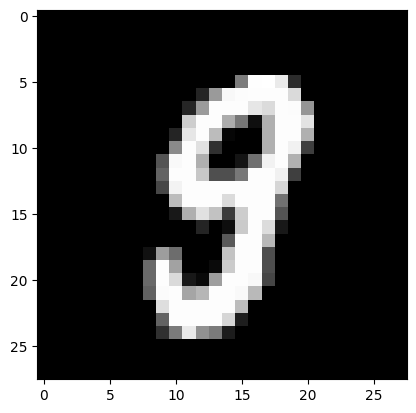

In [6]:
import matplotlib.pyplot as plt
print(inacclist[22])
print(obj.forwardPass(x_test[inacclist[22]]), y_test[inacclist[22]])
print(plt.imshow(np.array(x_test[inacclist[22]]).reshape(28,28), cmap = "gray"))

In [7]:
import pickle

with open("trained_Mnist.pkl", "wb") as file:
    pickle.dump(obj, file)


[4.13407815e-05 2.03387960e-07 2.78547938e-08 8.01393758e-04
 7.72017648e-07 2.96735346e-04 1.90143045e-09 9.53451938e-10
 2.75123294e-01 7.23736230e-01] [9]
AxesImage(shape=(28, 28))


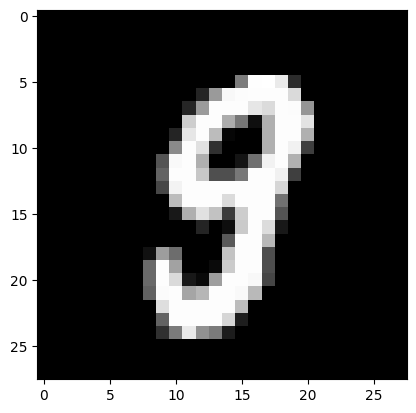

In [10]:
with open("trained_Mnist.pkl", "rb") as file:
    loaded_model = pickle.load(file)


print(loaded_model.forwardPass(x_test[inacclist[22]]), y_test[inacclist[22]])
print(plt.imshow(np.array(x_test[inacclist[22]]).reshape(28,28), cmap = "gray"))


**Face Classifier Training and Testing**

In [20]:
import pandas as pd
import numpy as np


'''Layer class which stores
  Layer weights matrix,
  Layer bias ,
  activation function of layer and
  output of Layer
  (Output should be stored when we call calculate_output function)
'''

class Layer:
  def __init__(self,nNeurons,weights,bias,activation_function,activation_derivative):
    self.nNeurons = nNeurons
    self.weights = weights
    self.bias = bias
    self.activation_function = activation_function
    self.activation_derivative = activation_derivative
    self.delta = None
  def calculate_output(self,data,input_Layer=False):#returns output which should be used as input for the next layer
    if(input_Layer):#for input layer the weight matrix should be transposed because input layer only takes one feature of input  not entire input
      self.output = np.array(data)
    else:
      self.weighted_sum = np.dot(data,self.weights)+self.bias
      self.output = np.array(self.activation_function(self.weighted_sum))#stores the outputs of Layer which contains all neurons outputs of that particular layer
    return self.output



'''
Network class which contains
number of layers as nLayers and
list containing all layer objects

has a create_Network functino which used to create weights and bias for entire network

forwardPass function is used to pass the input to the network through input layers and travels to the output layer through hidden layers
calculate_error function takes the target output as argument and calculates the error between target output and network output
'''

class Network:
  def __init__(self,nLayers):
    self.nLayers=nLayers
    self.Layers=[]
    self.pred_output=[]


  def sigmoid(self,x):
    return 1/(1+np.exp(x))
  def sigmoid_derivative(self,x):
    return self.sigmoid(x)*(1-self.sigmoid(x))
  def input_act(self,x):
    return x
  def relu(self,x):
    return np.maximum(0,x)
  def relu_derivative(self,x):
    return np.where(x < 0, 0, 1)
  def softmax(self,x):
    exp_values=np.exp(x)
    expSum=np.sum(exp_values)
    return exp_values/expSum
  def softmax_derivative(self,x):
    # return self.softmax(x) * (1 - self.softmax(x))
    s = self.softmax(x).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)



  def Create_Network(self,nInputs):
    for i in range(self.nLayers-1):
      if i==0:#for input layer each neuron has single weight as it takes single input
        weights=np.ones(nInputs)
        bias=np.ones((nInputs))
        self.Layers.append(Layer(nInputs,weights,bias,self.input_act, self.input_act))
      else:
        nNeurons=int(input(f"enter number of neurons of Layer {i+1} "))
        weights=0.1*np.random.randn(nInputs,nNeurons)
        bias=0.1*np.random.randn((nNeurons))
        self.Layers.append(Layer(nNeurons,weights,bias,self.relu, self.relu_derivative))
        nInputs=nNeurons
    #output layer which takes different activation function
    nNeurons=int(input(f"enter number of neurons in output layer "))
    weights=0.1*np.random.randn(nInputs,nNeurons)
    bias=np.zeros((nNeurons))
    self.Layers.append(Layer(nNeurons,weights,bias,self.softmax, self.softmax_derivative))




  def forwardPass(self,Input_data):
    for i in range(self.nLayers):
      if(i==0):
        Input_data=self.Layers[i].calculate_output(Input_data,True)
      else:
        Input_data=self.Layers[i].calculate_output(Input_data)
    return Input_data



  def One_hot(self,x):
    ans = []
    for i in range(4):
      if(i==x):
        ans.append(1)
      else:
        ans.append(0)
    return np.array(ans)


  def calculate_deltas(self, targets):
    for i in range(self.nLayers - 1, 0, -1):
      if i == len(self.Layers)-1:
        self.Layers[i].delta = (self.Layers[i].output - targets)
      else:
        self.Layers[i].delta = np.dot(self.Layers[i+1].delta, self.Layers[i+1].weights.T) * self.Layers[i].activation_derivative(self.Layers[i].weighted_sum)


  def Update_Weights(self,lr):
    for i in range(self.nLayers - 1, 0, -1):
      # self.Layers[i].bias -= np.dot(lr, self.Layers[i].delta)
      # self.Layers[i].weights -= self.Layers[i].delta[np.newaxis,:] * (np.dot(lr,self.Layers[i-1].output)[:, np.newaxis] * self.Layers[i].weights)
      self.Layers[i].weights -= lr * np.dot(self.Layers[i-1].output.T[:, np.newaxis], self.Layers[i].delta[np.newaxis, :])
      self.Layers[i].bias -= lr * self.Layers[i].delta





  def calculate_error(self, targets, outputs):
    return -np.sum(targets * np.log(outputs))

      # epsilon = 1e-15
      # outputs = np.clip(outputs, epsilon, 1 - epsilon)
      # loss = -np.sum(targets * np.log(outputs))
      # return loss



  def backwardPass(self,targets, lr):
    self.calculate_deltas(targets)
    self.Update_Weights(lr)



  def fit(self, input_datas, target_labels, epochs, learning_rate):
      for epoch in range(epochs):
        total_error = 0
        for input_data,target in zip(input_datas, target_labels):
          outputs = self.forwardPass(input_data)
          targets = self.One_hot(target)
          error = self.calculate_error(targets, outputs)
          total_error+=error
          self.backwardPass(targets, learning_rate)
        print(f"Epoch {epoch + 1} / {epochs}, Error: {total_error/len(input_datas)}")


# data collection
data = pd.read_csv('/content/drive/MyDrive/ml_lab/MLAssignment/final_data_64_64.csv')
# print(data)

Y = data.iloc[:, :1].values.flatten()
X = data.iloc[:, 1:].values

max_number = max(max(sublist) for sublist in X)
result_list = [[element / max_number for element in sublist] for sublist in X]
# print(result_list[0][0])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(result_list,Y, test_size=0.3, random_state=42)


# network creation
nLayers=int(input("enter number of layers"))
obj=Network(nLayers)  #object for Network class
obj.Create_Network(4096)  #creates a network by creating layers and appending to Layers list in Network class (this takes input length as argument)


# obj.fit(flatten_inputs, ytrain, 1000, 0.1)
# print(obj.Layers[-1].output)

enter number of layers3
enter number of neurons of Layer 2 512
enter number of neurons in output layer 4


In [ ]:
obj.fit(xtrain, ytrain, 20, 0.003)
# print(obj.Layers[-1].output)

Epoch 1 / 20, Error: 0.7222876000542577
Epoch 2 / 20, Error: 0.14216874971062476
Epoch 3 / 20, Error: 0.06536553724985956
Epoch 4 / 20, Error: 0.03325472414371335
Epoch 5 / 20, Error: 0.0216228377116664
Epoch 6 / 20, Error: 0.015394840306043132
Epoch 7 / 20, Error: 0.012209161794841302
Epoch 8 / 20, Error: 0.010190173042287644
Epoch 9 / 20, Error: 0.008752221788088495
Epoch 10 / 20, Error: 0.0076596295371983356
Epoch 11 / 20, Error: 0.006812834863593301
Epoch 12 / 20, Error: 0.006131336231552901


In [ ]:
# test_data = [image.flatten() for image in xtest]
# #for train data
# for input_data, output_data in zip(flatten_inputs, ytrain):
#   print(output_data,"  ",obj.forwardPass(input_data, output_data))
# print()
# #for test data
acc = 0
for input_data, output_data in zip(xtest, ytest):
  output = obj.forwardPass(input_data)
  if output[output_data] >= 0.9:
    acc+=1
print(acc/len(ytest))

0.9715302491103203


[1.11773914e-04 6.50736044e-05 1.42554895e-04 9.99680598e-01] 3
AxesImage(shape=(64, 64))


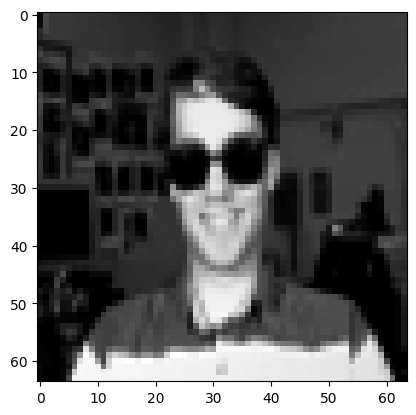

In [ ]:
import matplotlib.pyplot as plt
print(obj.forwardPass(xtest[358]), ytest[358])
print(plt.imshow(np.array(xtest[358]).reshape(64,64), cmap = "gray"))

In [ ]:
with open("trained_Face_Classifier.pkl", "wb") as file:
    pickle.dump(obj, file)

In [ ]:
import matplotlib.pyplot as plt

with open("trained_Mnist.pkl", "rb") as file:
    loaded_model = pickle.load(file)


print(obj.forwardPass(xtest[358]), ytest[358])
print(plt.imshow(np.array(xtest[358]).reshape(64,64), cmap = "gray"))